In [1]:
import pandas

Question = pandas.read_sql('Question', "sqlite:///QAT_final.db", index_col='index')


In [2]:
import datetime
def one_day(x):
    date = datetime.datetime.fromtimestamp(x['CreationDate_to_datetime'])
    return datetime.datetime(2011,1,1,date.hour,date.minute,date.second,date.microsecond)
Question['CreationDate_to_daytime'] = Question.apply(one_day, axis=1)

In [26]:
def func(x):
    date = datetime.datetime.fromtimestamp(x['BestAnsTime']-x['CreationDate_to_datetime'])
    return datetime.datetime(date.year,date.month,date.day,date.hour,date.minute,date.second,date.microsecond)
    #return x['BestAnsTime']-x['CreationDate_to_datetime']
Question['BestAnsTimeResponseTime'] = Question.apply(func, axis=1)

In [30]:
Question['BestAnsTimeResponseTime'].max()

Timestamp('1978-01-03 00:37:16')

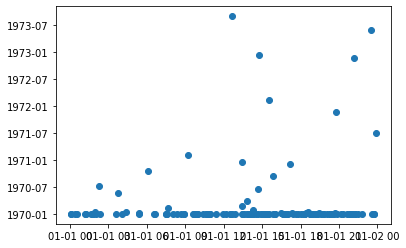

In [32]:
import matplotlib.pyplot as plt, matplotlib

#dates = matplotlib.dates.date2num(Question['BestAnsTimeResponseTime'])
plt.plot_date(Question['CreationDate_to_daytime'],Question['BestAnsTimeResponseTime'])
plt.show()